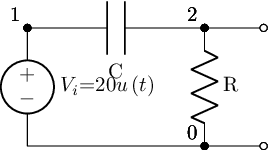

In [1]:
from lcapy import Circuit

cct = Circuit()
cct.add("""
Vi 1 0_1 step 20; down
C 1 2; right, size=1.5
R 2 0; down
W 0_1 0; right
W 0 0_2; right, size=0.5
P1 2_2 0_2; down
W 2 2_2;right, size=0.5""")
 
cct.draw(style='american')

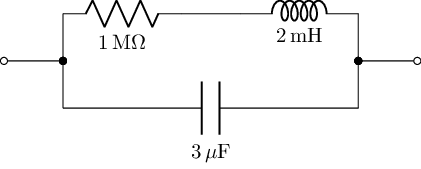

In [2]:
from lcapy import R, C, L
 
cct2 = (R(1e6) + L(2e-3)) | C(3e-6)

cct2.draw()

In [3]:
cct2.sch()

# Or as a string: cct2.netlist()

W 1 2; right=0.5
W 2 4; up=0.4
W 3 5; up=0.4
R1 4 6 1000000.0; right
W 6 7; right=0.5
L1 7 5 0.002; right
W 2 8; down=0.4
W 3 9; down=0.4
C1 8 9 3e-06; right
W 3 0; right=0.5

In [4]:
cct2.netlist()

'W 1 2; right=0.5\nW 2 4; up=0.4\nW 3 5; up=0.4\nR1 4 6 1000000.0; right\nW 6 7; right=0.5\nL1 7 5 0.002; right\nW 2 8; down=0.4\nW 3 9; down=0.4\nC1 8 9 3e-06; right\nW 3 0; right=0.5'

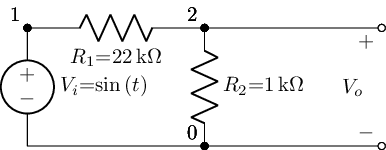

In [5]:
from lcapy import Circuit

# Create a file containing a circuit netlist
sch='''
Vi 1 0_1 {sin(t)}; down
R1 1 2 22e3; right, size=1.5
R2 2 0 1e3; down
P1 2_2 0_2; down, v=V_{o}
W 2 2_2; right, size=1.5
W 0_1 0; right
W 0 0_2; right
'''
 
fn="voltageDivider.sch"
with open(fn, "w") as text_file:
    text_file.write(sch)

# Create a circuit from a netlist file
netlist_cct = Circuit(fn)

netlist_cct.draw()

In [6]:
import numpy as np

t = np.linspace(0, 5, 1000)
vr = netlist_cct.R2.v.evaluate(t)

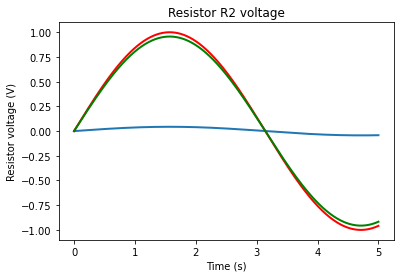

In [7]:
from matplotlib.pyplot import figure, savefig

fig = figure()
ax = fig.add_subplot(111, title='Resistor R2 voltage')

# The response voltage across R2
ax.plot(t, vr, linewidth=2)

# The input voltage, Vi
ax.plot(t, netlist_cct.Vi.v.evaluate(t), linewidth=2, color='red')

# The voltage aceoss R1
ax.plot(t, netlist_cct.R1.v.evaluate(t), linewidth=2, color='green')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Resistor voltage (V)');

In [8]:
from ipywidgets import interact

@interact(R=(1,10,1))
def response(R=1):
    cct = Circuit()

    cct.add('V 0_1 0 step 10;down')
    cct.add('L 0_1 0_2 1e-3;right')
    cct.add('C 0_2 1 1e-4;right')
    cct.add('R 1 0_4 {R};down'.format(R=R))
    cct.add('W 0_4 0; left')

    import numpy as np
    t = np.linspace(0, 0.01, 1000)
    vr = cct.R.v.evaluate(t)

    from matplotlib.pyplot import figure, savefig
    fig = figure()
    ax = fig.add_subplot(111, title='Resistor voltage (R={}$\Omega$)'.format(R))
    ax.plot(t, vr, linewidth=2)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Resistor voltage (V)')
    ax.grid(True)
    
    cct.draw()

interactive(children=(IntSlider(value=1, description='R', max=10, min=1), Output()), _dom_classes=('widget-int…

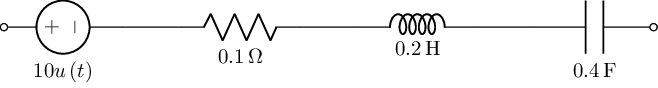

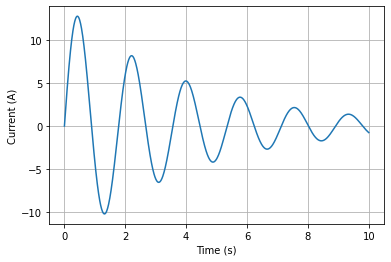

In [9]:
from lcapy import Vstep, R, C, L
from numpy import linspace

underDampedRLC = Vstep(10) + R(0.1) + L(0.2, 0)+ C(0.4, 0)
underDampedRLC.draw();

t = linspace(0, 10, 1000)

underDampedRLC.Isc.transient_response().plot(t);

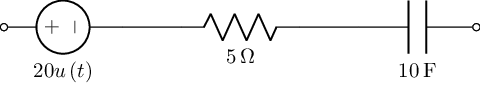

Should convert current expression to time-domain first


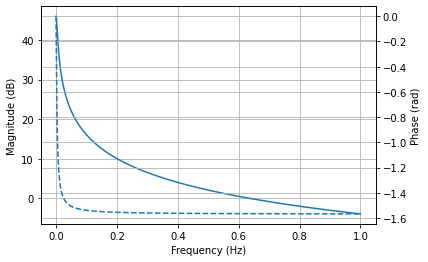

In [10]:
n = Vstep(20) + R(5) + C(10)
n.draw()

vf = linspace(0, 1, 4000)
n.Isc.frequency_response().plot(vf, log_scale=True);

In [11]:
@interact(R1=(0.1, 10),L1=(0.01, 1),C1=(0.01,0.5))
def damping(R1=0.1,L1=0.2,C1=0.4):
    underDampedRLC = Vstep(10) + R(R1) + L(L1)+ C(C1)
    underDampedRLC.draw();

    t = linspace(0, 10, 1000)

    underDampedRLC.Isc.transient_response().plot(t);

interactive(children=(FloatSlider(value=0.1, description='R1', max=10.0, min=0.1), FloatSlider(value=0.2, desc…

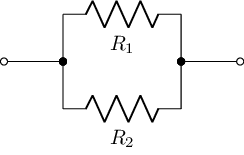

In [12]:
parallelR = R('R_1') | R('R_2')
parallelR.draw()


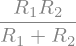

In [13]:
parallelR.simplify().R

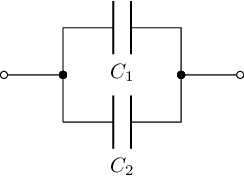

In [14]:
parallelC = C('C_1') | C('C_2')
parallelC.draw()

parallelC.simplify().C

In [15]:
from IPython.display import Latex
# Hmmm, could we make some cell block magic for this

txt = f"The overall resistance value simplifies to: {parallelR.simplify().R._repr_latex_()}"

Latex( txt)

<IPython.core.display.Latex object>

In [16]:
from lcapy import Vac, t, s, pi

#Representation of AC voltage source in time domain
#Vac(amplitude, phase)
Vac(20, pi/2).Voc(t)

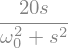

In [17]:
#Representation of AC voltage source in s domain
Vac(20).Voc(s)

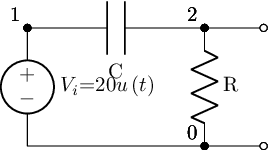

'0, 20/s, 20/(s + 1/(C*R))'

In [18]:
cct.draw()

f'{cct[0].V.s}, {cct[1].V.s}, {cct[2].V.s}'

In [19]:
cct[1].name

'1'

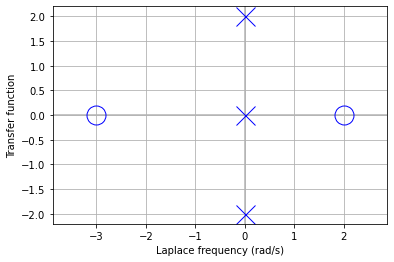

In [20]:
#pole-zero plot
from lcapy import s, j, transfer
from matplotlib.pyplot import savefig, show

H = transfer((s - 2) * (s + 3) / (s * (s - 2 * j) * (s + 2 * j)))
H.plot();

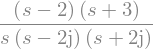

In [21]:
H

In [22]:
from lcapy import s, j, pi, f, transfer

from numpy import logspace
import matplotlib.pyplot as plt

H = transfer((s - 2) * (s + 3) / (s * (s - 2 * j) * (s + 2 * j)))

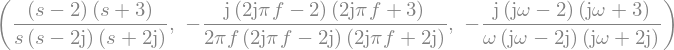

In [23]:
H(s), H(f), H(j * 2 * pi * f)

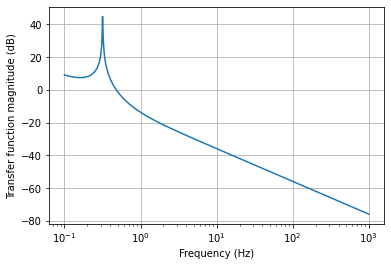

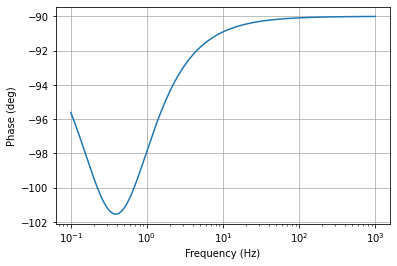

In [24]:
fv = logspace(-1, 3, 400)

# db vs frequency
H(f).dB.plot(fv, log_scale=True)

# Phase
H(f).phase_degrees.plot(fv,log_scale=True);

In [25]:
#%pip install control slycot
import control
import slycot # Makes for more efficent computation

In [26]:
control.tf([1,2,3], [4,5,6])

TransferFunction(array([1, 2, 3]), array([4, 5, 6]))

In [27]:

num = [[[1., 2.], [3., 4.]], [[5., 6.], [7., 8.]]]
den = [[[9., 8., 7.], [6., 5., 4.]], [[3., 2., 1.], [-1., -2., -3.]]]
sys1 = control.tf(num, den)

sys1

TransferFunction([[array([1., 2.]), array([3., 4.])], [array([5., 6.]), array([7., 8.])]], [[array([9., 8., 7.]), array([6., 5., 4.])], [array([3., 2., 1.]), array([-1., -2., -3.])]])

In [28]:
#State space system definition
sys = control.ss("1. -2; 3. -4", "5.; 7", "6. 8", "9.")

sys

StateSpace(array([[ 1., -2.],
       [ 3., -4.]]), array([[5.],
       [7.]]), array([[6., 8.]]), array([[9.]]))

In [29]:
sys.A

array([[ 1., -2.],
       [ 3., -4.]])

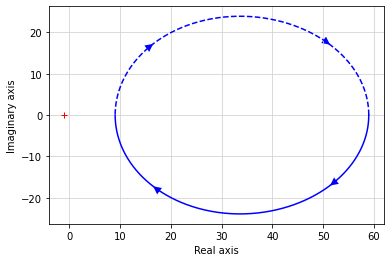

In [30]:
control.nyquist_plot(sys, omega=None, plot=True, color='b');

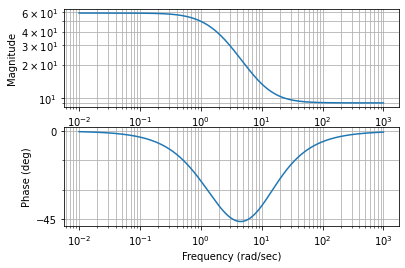

In [31]:
mag, phase, omega = control.bode(sys)